# Analysis of Penguins dataset

This data contains information on 3 different species of penguins from Antartica: Adelie, Chinstrap and Gentoo. The data was collected from 3 different islands in Antractica by Dr Kristen Gorman and Palmer Station, Antarica LTER.

## Install the data and relevant packages

In [21]:
pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins

## View the data

In [23]:
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Initial exploration - correlation analysis

<AxesSubplot:>

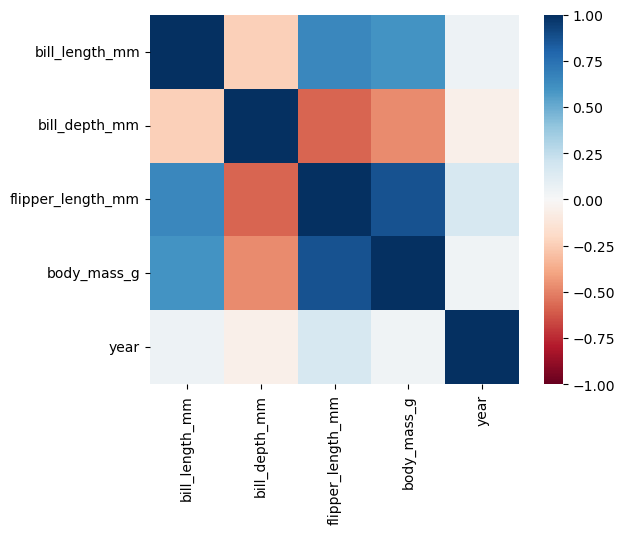

In [24]:
corr = penguins.corr()
sns.heatmap(corr, vmin = -1.0, vmax = 1.0, square = True, cmap = "RdBu")

The heatmap above shows the correlations between the x variables in the data. The darker the colour the stronger the correlation between these variables (see colour bar to the right). The diagonal line down the centre of the graph can be ignored as this simply one varible compare with itself. From this heatmap we can clearly see that year shows very little or no correlation with any of the variables. All other varibales seem to have a relativley strong correlation with one another. Of these correlations bill_depth_mm vs bill_length_mm appears to have the weakest correlation and flipper_length_mm vs body_mass_g appears to have the strongest correlations. From this basic information we might start to assume that these penguins either have long, narrow bills or short and 'stubby' bills. The strong correlation of flipper_length with body_mass infers that heavier penguins require longer flippers to support them, this makes logical sense. There also appears to be a relatively strong correlation between flipper_length_mm vs bill_depth_mm or bill_length_mm; however the correlation with flipper_length and bill_length is positive, where as flipper_length and bill_depth is negative. The direction and strength of these correlations are also the same for body_mass vs bill_length or bill_depth. This is not surprising as given the strong correlation between flipper_length and body_mass. 

Therefore from this simple heatmap we can already build up a possible picture of what our penguins might look like. Lighter penguins (and thus probably shorter penguins) will have shorter flippers and shorter, and deeper bills; whereas heavier (likely larger) penguins have longer flipper and longer, more narrow bills. However, it is imporant to remeber that this data came from three differnet species of penguins and therefore our assumptions could be entirely wrong as this data is not accounting for how the data from the individual species might be skewing this relationship. Thus it would be interesting to look at these correlations with the species of penguins accounted for (see plot below)

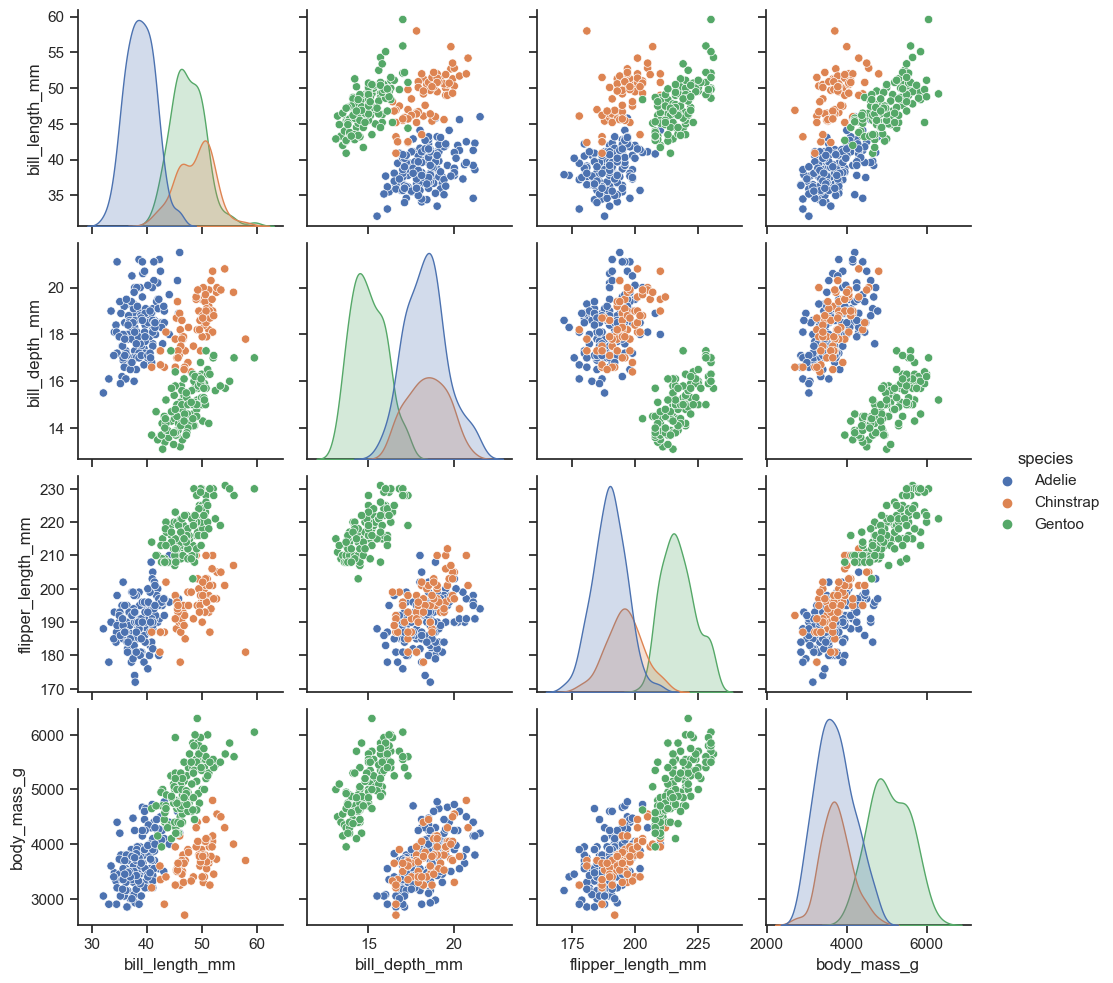

In [25]:
sns.set(style="ticks", color_codes=True)

penguins = sns.load_dataset("penguins")
%matplotlib inline

sns.pairplot(penguins, hue="species")

In this scatter matrix above we can see at first glance that the correlations of variables between species appear to be similar althought the spread of data varies between species. Thus the assumptions of penguin build could be correct both within and between species. We can also see by that the data points for the different species are grouped, with Gentoo penguins appearing to be the most different compared to Adelie and Chinstrap, which often are clustered together. It would be interesting to do a statistical analysis on the data to see whether each characteristic trait does differ between groups and see if this can be explained by the ecology of these different species. However I feel this is slightly too much detail for this assesment. Therefore instead, I am going to use a Nearest Neighbours Analysis to see if it is possbile to predict which of the three species of penguins a new penguin could be. To do this I need to choose two varibles that show minimal overlap of data points and minimal correlation with one another. Judging by the graph above and the heatmap I will therefore conduct this analysis with bill_length and bill_depth. You can see in the graph below bill_length by bill_depth enlarged, showing clearly the sepearation of data points and minimal correlation.

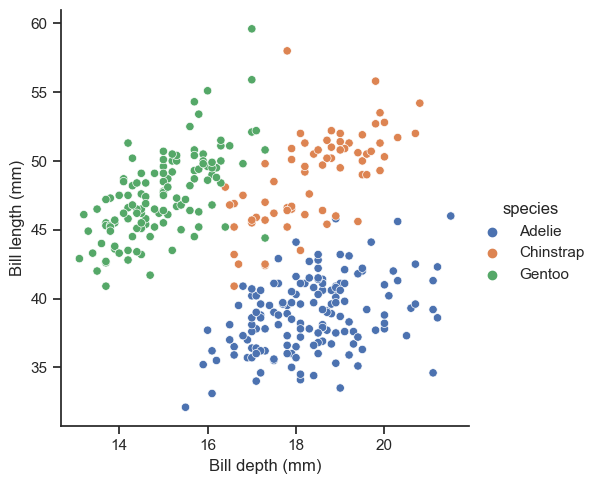

In [26]:
sns.relplot(data=penguins, x="bill_depth_mm", y="bill_length_mm",hue="species").set_axis_labels("Bill depth (mm)","Bill length (mm)")

In [27]:
penguins2 = penguins.dropna() #the model was not able to run with NAs in the data

In [28]:
y,index = pd.factorize(penguins2["species"]) #the penguins species need to be given numberical values in order for the model to run
X = penguins2[["bill_depth_mm", "bill_length_mm"]]

In [29]:
index #looking at the order in which the species are numbered

Index(['Adelie', 'Chinstrap', 'Gentoo'], dtype='object')

In [30]:
y #this output combined with the Index above show that Adelie have been re-labeled as 0, Chinstrap as 1 and Gentoo as 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## Creating Nearest Neighbours Model

In [31]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier

model_k10 = KNeighborsClassifier(n_neighbors=10)
model_k10.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=10)

### Testing the model

In [32]:
round(model_k10.score(test_X, test_y).max(), 2)

C:\Users\bt386\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.94

Model looks good, will still attempt to refine K to get the best output. First I would like to try and plot the model!

In [33]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=True, alpha=0.8, ax=ax)

C:\Users\bt386\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


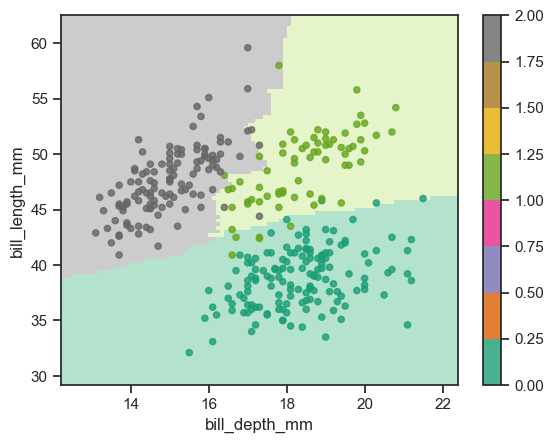

In [34]:
plot_knn(model_k10, X, y)

Above is the Nearest Neighbours Model (model_k10) plotted. The colour bar to the right gives a key for the colours, where by 0 (Adelie) is dark green, 1 (Chinstrap) is light green and 2 (Gentoo) is grey. 

### Refining the model

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    "n_neighbors" : range(1, 51),
}
model = GridSearchCV(KNeighborsClassifier(), parameters)
model.fit(train_X, train_y)

C:\Users\bt386\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bt386\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

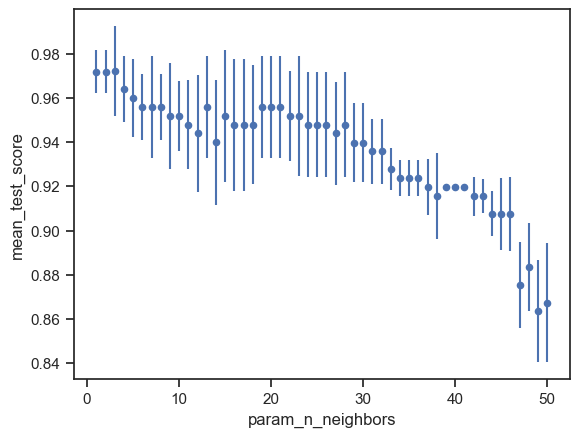

In [36]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

In [37]:
round(cv_results["mean_test_score"].max(), 2)

0.97

In [38]:
cv_results["mean_test_score"].idxmax()

2

In [43]:
cv_results.loc[2]

mean_fit_time                  0.000779
std_fit_time                    0.00039
mean_score_time                0.001614
std_score_time                 0.000506
param_n_neighbors                     3
params               {'n_neighbors': 3}
split0_test_score                  0.94
split1_test_score                  0.96
split2_test_score                  0.98
split3_test_score                  0.98
split4_test_score                   1.0
mean_test_score                   0.972
std_test_score                 0.020396
rank_test_score                       1
Name: 2, dtype: object

The GridSearch has shown that using a k value of 3 will give a more accurate model of 0.97

In [60]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier

model_k3 = KNeighborsClassifier(n_neighbors=3)
model_k3.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

C:\Users\bt386\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


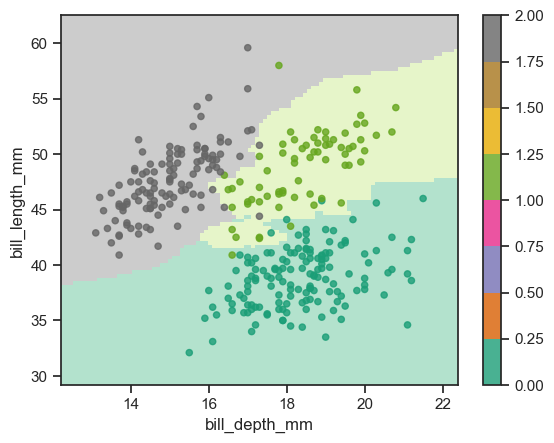

In [61]:
plot_knn(model_k3, X, y)

In [62]:
round(model_k3.score(test_X, test_y).max(), 2)

C:\Users\bt386\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.93

In order to make my model outcomes reproducable I have set a random state of 42 for the creation of both model_k10 and model_k3, therefore the test score for model_k3 is only 0.93.

C:\Users\bt386\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


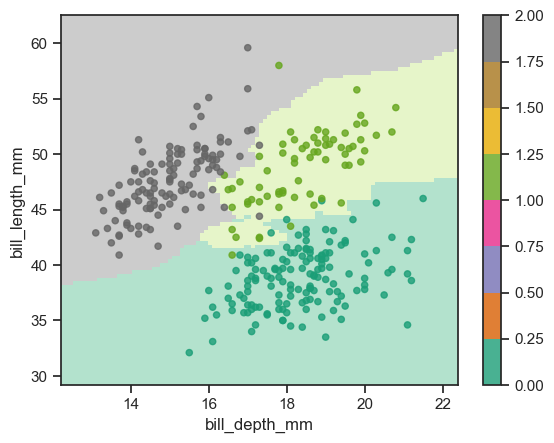

In [57]:
plot_knn(model, X, y)

In [59]:
model.score(test_X, test_y)

C:\Users\bt386\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

Above is a plot the best result from the GridSearchCV and gives a model score of 1 - apparently the perfect model! Although this should always be taken with a pinch of salt. For example you can see that some of the data points do not fall within the correct 'zone' (the colour of some of the data points do not match the correct background) and therefore we can already tell by our exisiting data that the model predicitons will not be perfect.